# Análisis de los 25 retailers más grandes de Estados Unidos

<center><img src="https://www.thebalancesmb.com/thmb/aGJwKZ_Cgh8nNtoyXgoBctX-iAs=/3000x2000/filters:fill(auto,1)/largest-us-retailers-4045123-Final-5c76a9f6c9e77c0001fd592f.png"  height ="auto" width="500" s></center>
Las mayores empresas minoristas estadounidenses que figuran en la lista de las mayores cadenas minoristas de Estados Unidos entre los informes Global Powers de 2016 y 2015. Walmart, Costco, Kroger, son las mayores cadenas minoristas del mundo en términos de ingresos anuales. Eso es según el informe 2016 Global Powers of Retailing, que se publica cada año por Deloitte Touche Tohmatsu y STORES Magazine.

<br/>El dataset fue obtenido en Kaggle por [Yam Peleg.](https://www.kaggle.com/yamqwe/largest-us-retailers-2015e)

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers.csv')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Explorando el dataset

In [ ]:
df.shape

(25, 6)

In [ ]:
df.columns

Index(['Company', 'Sales', 'Stores', 'Sales/Avg. Store', 'Store Count Growth',
       'Category'],
      dtype='object')

### Exploración de los valores nulos

In [ ]:
df.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

In [ ]:
df["Stores"]=df["Stores"].fillna(0)
df["Sales/Avg. Store"]=df["Sales/Avg. Store"].fillna(0)
df["Store Count Growth"]=df["Store Count Growth"].fillna(0)
df["Category"]=df["Category"].fillna('None')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

Buscando conocer la compañia dominante en ventas:

In [ ]:
df.sort_values('Sales',ascending=False)[['Company','Sales']].head(1)

,Company,Sales
0,Walmart US,658119


<p>Descartando a <strong><mark style="background: rgba(251, 243, 219, 1);">Walmart</mark></strong><strong> </strong>como compañía dominante. Se obtiene el siguiente resultado sobre el promedio de ventas:</p>

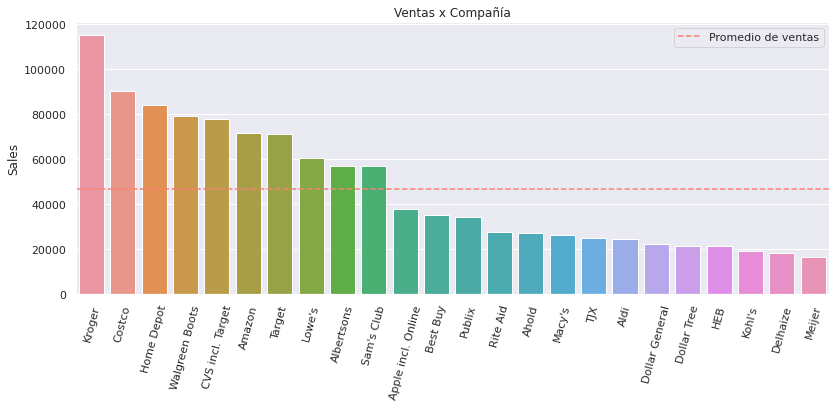

In [ ]:
df_without_walmart= df[df.Company != 'Walmart US'] # Data frame without Walmart
sns.set()
figure, axes= plt.subplots(figsize=(13.5,5), gridspec_kw={"height_ratios": [3]});
sns.barplot(data=df_without_walmart,x='Company',y='Sales',ax=axes)
axes.axhline(df_without_walmart['Sales'].mean(),ls='--',label='Promedio de ventas',color='Salmon')
axes.tick_params(axis='x', rotation=75);axes.set(xlabel=None)
plt.title('Ventas x Compañía')
plt.legend()
plt.show()

<p>&emsp;A través de la grafica <b>Ventas x Compañía</b> se aprecia que las primeras diez compañías de retail en EE.UU. tienen la mayoría de las ventas, a comparación de las compañías consecutivas.  Obteniendo un promedio de ventas de <strong><mark style="background: rgba(251, 243, 219, 1);"> 4,6602.42 </mark></strong><strong> </strong>entre la décima y onceava compañía.</p>

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

<p> Para el siguiente análisis se descacatará <strong><mark style="background: rgba(251, 243, 219, 1);">Walmart</mark></strong><strong> </strong> para obtener la mayoría de los retails en ventas.</p>

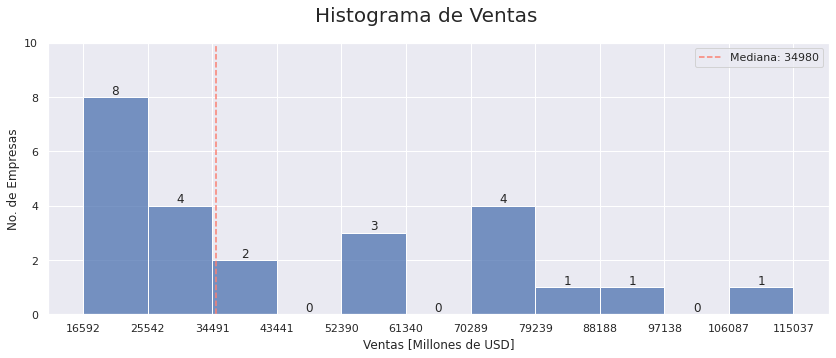

In [ ]:
# Mediana en ventas
mediana = np.median(df['Sales'])
# Graph
count, aux_bins=np.histogram(df_without_walmart['Sales'],bins=11)
figure, axes = plt.subplots(figsize=(14,5))
sns.set()
sns.histplot(df_without_walmart,x='Sales', ax=axes,bins=aux_bins)
axes.set(xticks=aux_bins); axes.set_ylim([0,10])
axes.set_xlabel('Ventas [Millones de USD]'); axes.set_ylabel('No. de Empresas')
figure.suptitle('Histograma de Ventas',size=20)
axes.bar_label(axes.containers[0])
axes.axvline(mediana, ls='--', color='Salmon', label='Mediana: %d'%mediana)
axes.legend()
plt.show()

Observando la gráfica de **Histograma de Ventas** se muestra que la mayoría de retails, siendo 14, están entre los <u>16,592 y 43,441 en ventas [Millones de USD]</u>. Además, existen pocas compañías que tienen mayores ventas por fuera de la *mediana* en ventas.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

Realizando el histograma ahora hacia la cantidad de mayoría de tiendas de las compañías. No se tomará en cuenta aquellos que no poseen tiendas. Obteniendo:

In [ ]:
df_stores=df[df['Stores']>0].reset_index(drop=True)
df_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Target,71208,1772.0,39.982033,-0.010056,Supercenters
7,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
8,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
9,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


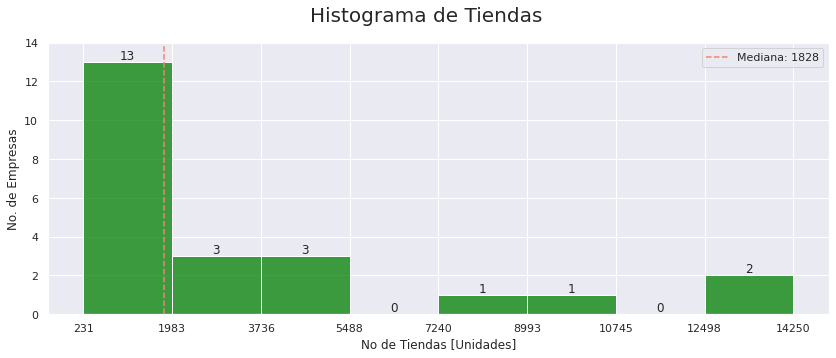

In [ ]:
# Mediana en ventas
mediana = np.median(df_stores['Stores'])
# Graph
count, aux_bins = np.histogram(df_stores['Stores'],bins=8)
figure, axes = plt.subplots(figsize=(14,5))
sns.set()
sns.histplot(df_stores,x='Stores', ax=axes,bins=aux_bins, color="Green")
axes.set(xticks=aux_bins); axes.set_ylim([0,14])
axes.set_xlabel('No de Tiendas [Unidades]'); axes.set_ylabel('No. de Empresas')
figure.suptitle('Histograma de Tiendas',size=20)
axes.bar_label(axes.containers[0])
axes.axvline(np.median(df_stores['Stores']), ls='--',color='Salmon',label='Mediana: %d'%mediana)
axes.legend()
plt.show()

A partir de la gráfica de **Histograma de Tiendas** se observa que la mayoría de compañias cuentan entre los 231 y 5,488 número de tiendas [Uds]. Siendo 19 de los 25 retails.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Esto es, comprobar la hipotesis de:
> Si la compañía tiene más tiendas podrá generar más dinero de ventas.
</br> Utilizando la gráfica de dispersión (*Scatter*) nos mostrará dicha relación. Para este caso, utilizaremos dos graficas que muestre utilizando a la compañía dominante en ventas y en la otra se descartará. Con ello buscamos ver si influye dicha compañía en el comportamiento de las gráficas.

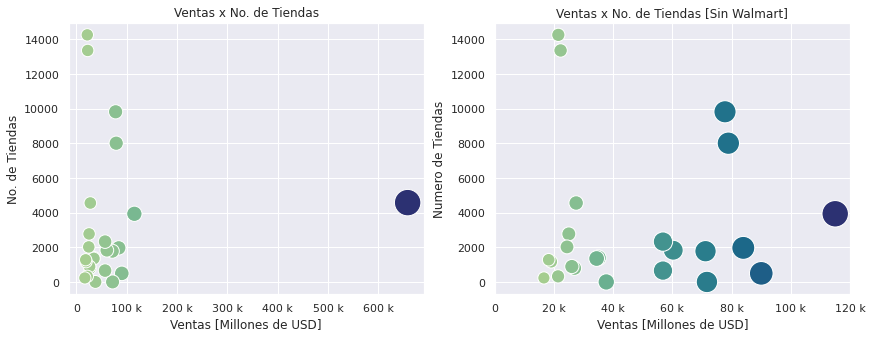

In [ ]:
# Graph
figure,axes=plt.subplots(1,2, figsize=(14,5))
sns.set()
sns.scatterplot(data=df,x='Sales',y='Stores',ax=axes[0],hue='Sales',size='Sales',
                sizes=(150,700),palette='crest',legend=False)
axes[0].xaxis.set_major_formatter(ticker.EngFormatter())
axes[0].set_title("Ventas x No. de Tiendas")
axes[0].set_xlabel("Ventas [Millones de USD]");axes[0].set_ylabel("No. de Tiendas")

sns.scatterplot(data=df_without_walmart,x='Sales',y='Stores',ax=axes[1],hue="Sales", size="Sales", 
                sizes=(150, 700),palette='crest',legend=False)
axes[1].set_title("Ventas x No. de Tiendas [Sin Walmart]")
axes[1].xaxis.set_major_formatter(ticker.EngFormatter())
axes[1].set_xlabel("Ventas [Millones de USD]"); axes[1].set_ylabel("Numero de Tiendas")
axes[1].set_xlim([0,120000])

figure.show()

| **Con Walmart**                                                                     | **Sin Walmart**                                                        
|-------------------------------------------------------------------------------------|------------------------------------------------------------------------
| Poseen una gran dispersión y la mayoría de compañías se encuentran entre 0 & 115k.   | No muestran continuidad de dispersión y varían los rangos por compañía |

Entonces, corroborando con las gráficas de **Ventas x No. de Tiendas** (Con y Sin Walmart) se comprueba que no hay ninguna relación entre la cantidad de tiendas para determinar mayor ingreso en ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II.&nbsp;Preguntas&nbsp;opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a773c954-66af-417f-bc3e-969ec3394874' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>